# Exercise 5: PAC Learnable

In this assignment you will implement some aspect of the PAC Learnable framework

## Do not start the exercise until you fully understand the submission guidelines.

* The homework assignments are executed automatically. 
* Failure to comply with the following instructions will result in a significant penalty. 
* Appeals regarding your failure to read these instructions will be denied. 
* Kindly reminder: the homework assignments contribute 50% of the final grade.


## Read the following instructions carefully:

1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise may take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deductions.
1. You are responsible for the correctness of your code and should add as many tests as you see fit to this jupyter notebook. Tests will not be graded nor checked.
1. Complete the required functions in in this notebook marke with TODO comment
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), numpy and scipy only. **Do not import anything else.**
1. Your code must run without errors. Use at least `numpy` 1.15.4. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Submission includes a zip file that contains the this notebook as well as a file name `hw5.pdf` with the theoretical answers, with your ID as the file name. For example, `hw1_123456789_987654321.zip` if you submitted in pairs and `hw1_123456789.zip` if you submitted the exercise alone.

In [1]:
#Nir Shoham 322657073 Ron Aharonson 211741921

In [2]:
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, bernoulli


In [3]:
# Configurable params
n_train_samples = 20  # m
n_test_samples = int(1e6)  # Will be used to estimate the entire infinite instance space
uni_lower_bound = -2
uni_upper_bound = 2
delta = 0.1  # How uncertain I am
true_error_prob = 0.02  # epsilon is the true error proabability
n_exp = 10_000  # Number of experiments we going to run to check our sample complexity bounds

# Visualize params
s = 0.9


In [4]:
# Utils
def draw_circle(radius: float,
                center_point: tuple = (0, 0),
                fill: bool = False,
                color: str = 'black') -> plt.Figure:
    fig, ax = plt.subplots()
    circle = plt.Circle(center_point, radius=radius, fill=fill, color=color)
    ax.add_patch(circle)
    eps = 0.3
    ax.set_ylim(uni_lower_bound - eps, uni_upper_bound + eps)
    ax.set_xlim(uni_lower_bound - eps, uni_upper_bound + eps)

    return fig

def draw_circles(radius: list, center_point: tuple = (0, 0), colormap='viridis') -> plt.Figure:
    fig, ax = plt.subplots()
    cmap = plt.get_cmap(colormap, len(radius))  # Get a colormap with enough colors
    eps = 0.3
    for i, r in enumerate(radius):
        color = cmap(i)  # Get color from colormap
        circle = plt.Circle(center_point, radius=r, fill=False, color=color)
        ax.add_patch(circle)

    # Adjust the view limits
    max_radius = max(radius)
    ax.set_ylim(uni_lower_bound - eps, uni_upper_bound + eps)
    ax.set_xlim(uni_lower_bound - eps, uni_upper_bound + eps)

    return fig

# Instance space

In this exercise, our dataset consists of samples drawn from the distribution $\pi$. These samples belong to the subset $D \subseteq X$, where $X = \mathbb{R}^2$. The distribution $\pi$ follows a uniform distribution over the interval $[-2, 2]$.

In [5]:
def sample_uniform_instance_space(n_samples: int,
                                  uni_lower_bound: float,
                                  uni_upper_bound: float) -> np.ndarray:
    """
    Generate samples in R^2 from 2 independent uniform distribution with the same support.
    
    input:
    ------
    n_samples: int represents the number of isntances we want to generate
    uni_lower_bound: float the lower bound of the uniform distribution support
    uni_upper_bound: float the upper bound of the uniform distribution support
    
    return
    ------
    samples: 2d numpy array containing samples distributed according to 2 indepndent uniform distributions
    """
    samples = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    samples = np.random.uniform(uni_lower_bound, uni_upper_bound, size=(n_samples, 2))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################


    return samples

In [6]:
n_samples = 20
uni_lower_bound = -2
uni_upper_bound = 2
samples = sample_uniform_instance_space(n_samples=n_samples, uni_lower_bound=uni_lower_bound, uni_upper_bound=uni_upper_bound)

Text(0, 0.5, 'x2')

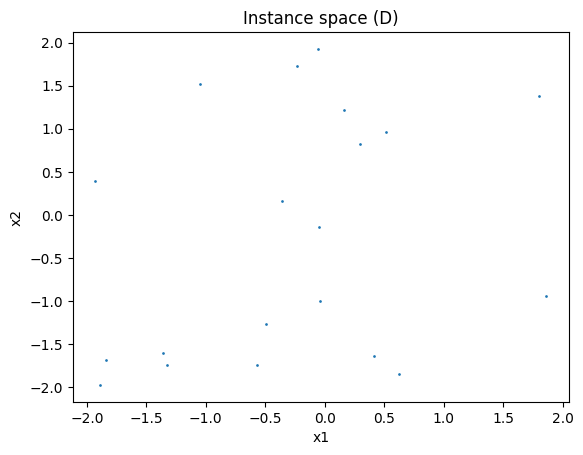

In [7]:
fig, ax = plt.subplots()

ax.scatter(samples[:, 0], samples[:, 1], s=s)
ax.set_title("Instance space (D)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")

# Concept space

Our concept in this exercies will be the concentric circles  
$$c(r) = \{(x, y|x^2 +y^2 \leq r^2)\}$$

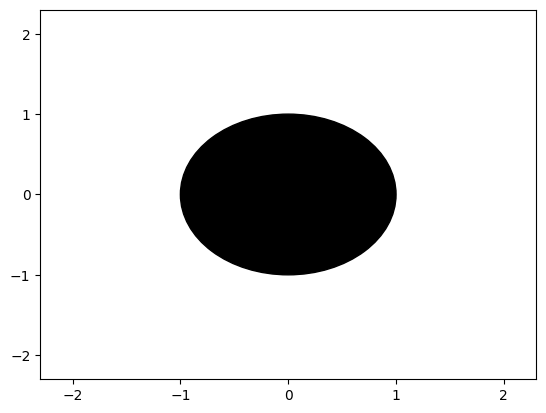

In [8]:
r_concept = 1. 
fig = draw_circle(radius=r_concept, fill=True)

In this exercise, we will assume that our concept space and hypothesis space are the same, denoted by $H = C$. Therefore, our hypotheses will also take the form of concentric circles.

# Hypothsis space

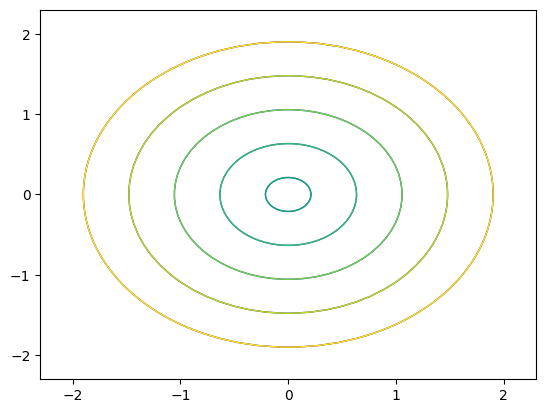

In [9]:
hypotesis_rs = np.linspace(-2 + 0.1, 2 - 0.1, 10) 
fig = draw_circles(radius=hypotesis_rs)


# Sample complexity

In class, we discussed the sample complexity bound for the case of concentric circles. Given $\varepsilon$, the desired maximal true error, and $1 - \delta$, the probability of achieving this error, the sample size $m(\varepsilon, \delta)\in O(f(\varepsilon), g(\delta))$. Use this bound to determine the minimum number of samples required to achieve these guarantees.

In [10]:
def sample_bound(true_error: float, uncertentity: float) -> int:
    """
    Return the sample complexity of cocentric circle in R^2 problem
    
    input:
    ------
    true_error: float desired upper bound on our true error
    uncertentity: float 1 - probability to get this error for a random dataset
    
    return:
    -------
    m: int the number of minimal samples
    """
    m = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    m = np.log(1/uncertentity)/true_error
    m=int(np.ceil(m))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return m



In [11]:
eps = 0.02
delta = 0.05

n_train_samples = sample_bound(true_error=eps, uncertentity=delta)
f"we will need at least m={n_train_samples} samples in order to get true error of at most {eps} with probability of {1-delta}"

'we will need at least m=150 samples in order to get true error of at most 0.02 with probability of 0.95'

# Bulding our training set

In [12]:
concept_r = 1.

###########################################################################
# TODO: Implement this cell.                                              #
###########################################################################
# n_train_samples from X according to the dsitrbution pi
samples = sample_uniform_instance_space(n_train_samples,uni_lower_bound,uni_upper_bound)
# A callable that gets as input a samples and return an indicator if they belong to the concept or no
concept_func = lambda x1, x2 : x1**2 + x2**2 <= concept_r**2
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

x1 = samples[:, 0]
x2 = samples[:, 1]
# The concept (label) of your training data
c_train = concept_func(x1, x2)
# This is the actual expreiment data set (D)
train_data = np.vstack([x1, x2, c_train]).T

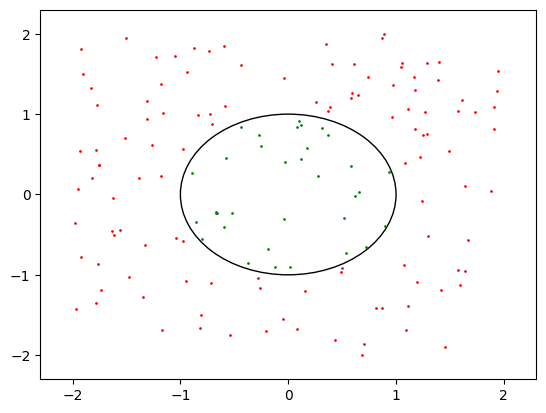

In [13]:
# Visualizing all toghther
fig = draw_circle(radius=concept_r)
plt.scatter(train_data[c_train.astype('bool'), 0], train_data[c_train.astype('bool'), 1], s=s, c='g')
plt.scatter(train_data[~c_train.astype('bool'), 0], train_data[~c_train.astype('bool'), 1], s=s, c='r')

# Consistent learner

In [14]:
def learning_algorithm(D: np.ndarray, c: np.ndarray) -> float:
    """
    The concetric circles consistent learning algorithm
    
    input:
    ------
    D: a 2d numpy array consist of the training instances
    c: a 1d numpy array consist of the concept values (label) 
    
    return:
    -------
    hypothesis_r: float the radius of our learned hypothesis
    """
    hypothesis_r = 1e-6
    is_instance_belongs_to_concept = c == 1

    # Handle the case: in our dataset all the labels are the same
    if is_instance_belongs_to_concept.sum() == 0:
        return hypothesis_r
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    true_instances = D[is_instance_belongs_to_concept]
    distances_squared = np.sum(true_instances**2, axis=1)
    # The maximum distance will be our hypothesis radius squared
    max_distance_squared = np.max(distances_squared)
    # Take the square root to get the radius
    hypothesis_r = np.sqrt(max_distance_squared)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return hypothesis_r

In [15]:
# L(D)
hypothesis_r = learning_algorithm(D=train_data[:, :-1], c=train_data[:, -1])
hypothesis_r

0.9813175972884803

In [16]:
###########################################################################
# TODO: Implement this cell.                                              #
###########################################################################
# A callable that gets as input a samples and return an indicator if they belong to the hypotesis or not
hypotesis_func = lambda x1, x2: x1**2 + x2**2 <= ((hypothesis_r ** 2) +1e-6) ## add epsilon for inconsisten
# The predictions according to the hypotesis
c_pred = hypotesis_func(x1,x2)
print(c_pred[c_pred != c_train])
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

# Check consistency (make sure you are not failing here due to numerical stability issues)
assert (c_pred == c_train).all(), "your learner is not consistent!"


[]


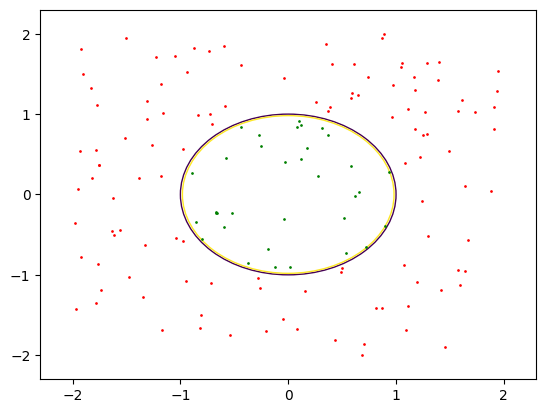

In [17]:
# Visualizing the training data set
fig = draw_circles(radius=[concept_r, hypothesis_r])
plt.scatter(train_data[c_train.astype('bool'), 0], train_data[c_train.astype('bool'), 1], s=s, c='g')
plt.scatter(train_data[~c_train.astype('bool'), 0], train_data[~c_train.astype('bool'), 1], s=s, c='r')

In [18]:
# Let's sample more instances from our distribution over X
test_samples = sample_uniform_instance_space(n_samples=n_test_samples, uni_lower_bound=uni_lower_bound, uni_upper_bound=uni_upper_bound)

# Does the instance belong to the concept
x1 = test_samples[:, 0]
x2 = test_samples[:, 1]
c_test = concept_func(x1, x2)
test_data = np.vstack([x1, x2, c_test]).T

# Does the instance belong to the hypothesis
c_pred = hypotesis_func(test_data[:, 0], test_data[:, 1])

# True Error Calculations
The plot below illustrates the following:

Instances in red represent points from $\Omega=(X, \pi)$ that neither belong to the concept nor the hypothesis.  
Instances in green are points from $\Omega=(X, \pi)$ that belong to both the concept and the hypothesis.  
Instances in blue show points from $\Omega=(X, \pi)$ that belong to the concept but not to the hypothesis.

This means that the blue instances represent the true error.

Text(0, 0.5, 'x2')

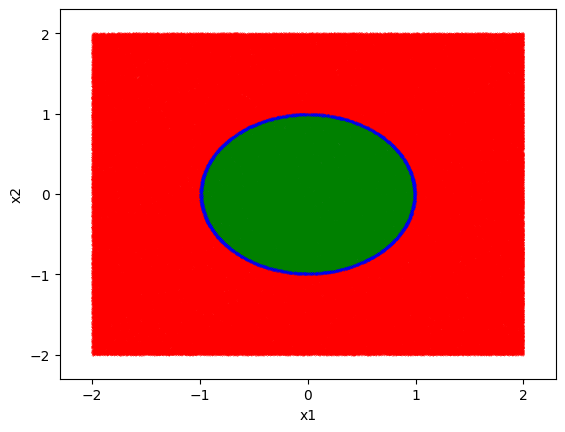

In [19]:
# True error empirical estimation
is_error = c_pred != c_test

# In the blue this is the wrongly classified instances (True error)
_ = draw_circles(radius=[concept_r, hypothesis_r])
plt.scatter(test_data[c_test.astype('bool'), 0], test_data[c_test.astype('bool'), 1], s=0.01, c='g')
plt.scatter(test_data[~c_test.astype('bool'), 0], test_data[~c_test.astype('bool'), 1], s=0.01, c='r')
plt.scatter(test_data[is_error, 0], test_data[is_error, 1], s=0.01, c='b')

plt.gca().set_xlabel("x1")
plt.gca().set_ylabel("x2")

Implement a function that calculting the true error $\pi(c(x)\neq h(x)$ HINT: the square total area is 16, what does it mean in probability tems?

In [20]:
def calculte_true_error(concept_r: float, hypothesis_r: float) -> float:
    """
    Calculting the true error of cocentric circle under the uniform distribution over [-2, 2]
    
    input:
    ------
    concept_r: float the radius of the concept 
    hypothesis_r: float the radius of the learnt hypothesis
    
    return:
    error_rate: float the true error
    """
    error_rate = 0.
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    total_area = 16 # 2*2 * 2*2 -> [-2,2]^2
    hypothesis_area = np.pi * (hypothesis_r ** 2)
    concept_area = np.pi * (concept_r ** 2)
    error_rate = (concept_area - hypothesis_area)/ total_area
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return error_rate

In [21]:
true_error = calculte_true_error(
    concept_r=concept_r,
    hypothesis_r=hypothesis_r
)

print(f"True error rate is: {true_error:.3f}")

True error rate is: 0.007


# Sufficent VS Insufficient sampling

Given the following scenario:
$\pi$ is the same as above  
$c(r = 1)$  
$\varepsilon = 0.02$  
$\delta = 0.05$  
Create the following graph using the below methods twice:
1. With sufficent number of samples
2. With insufficent number of samples

NOTE: in praticular you need to caclulte the emeprical $\delta$ for each one of the above scenarios

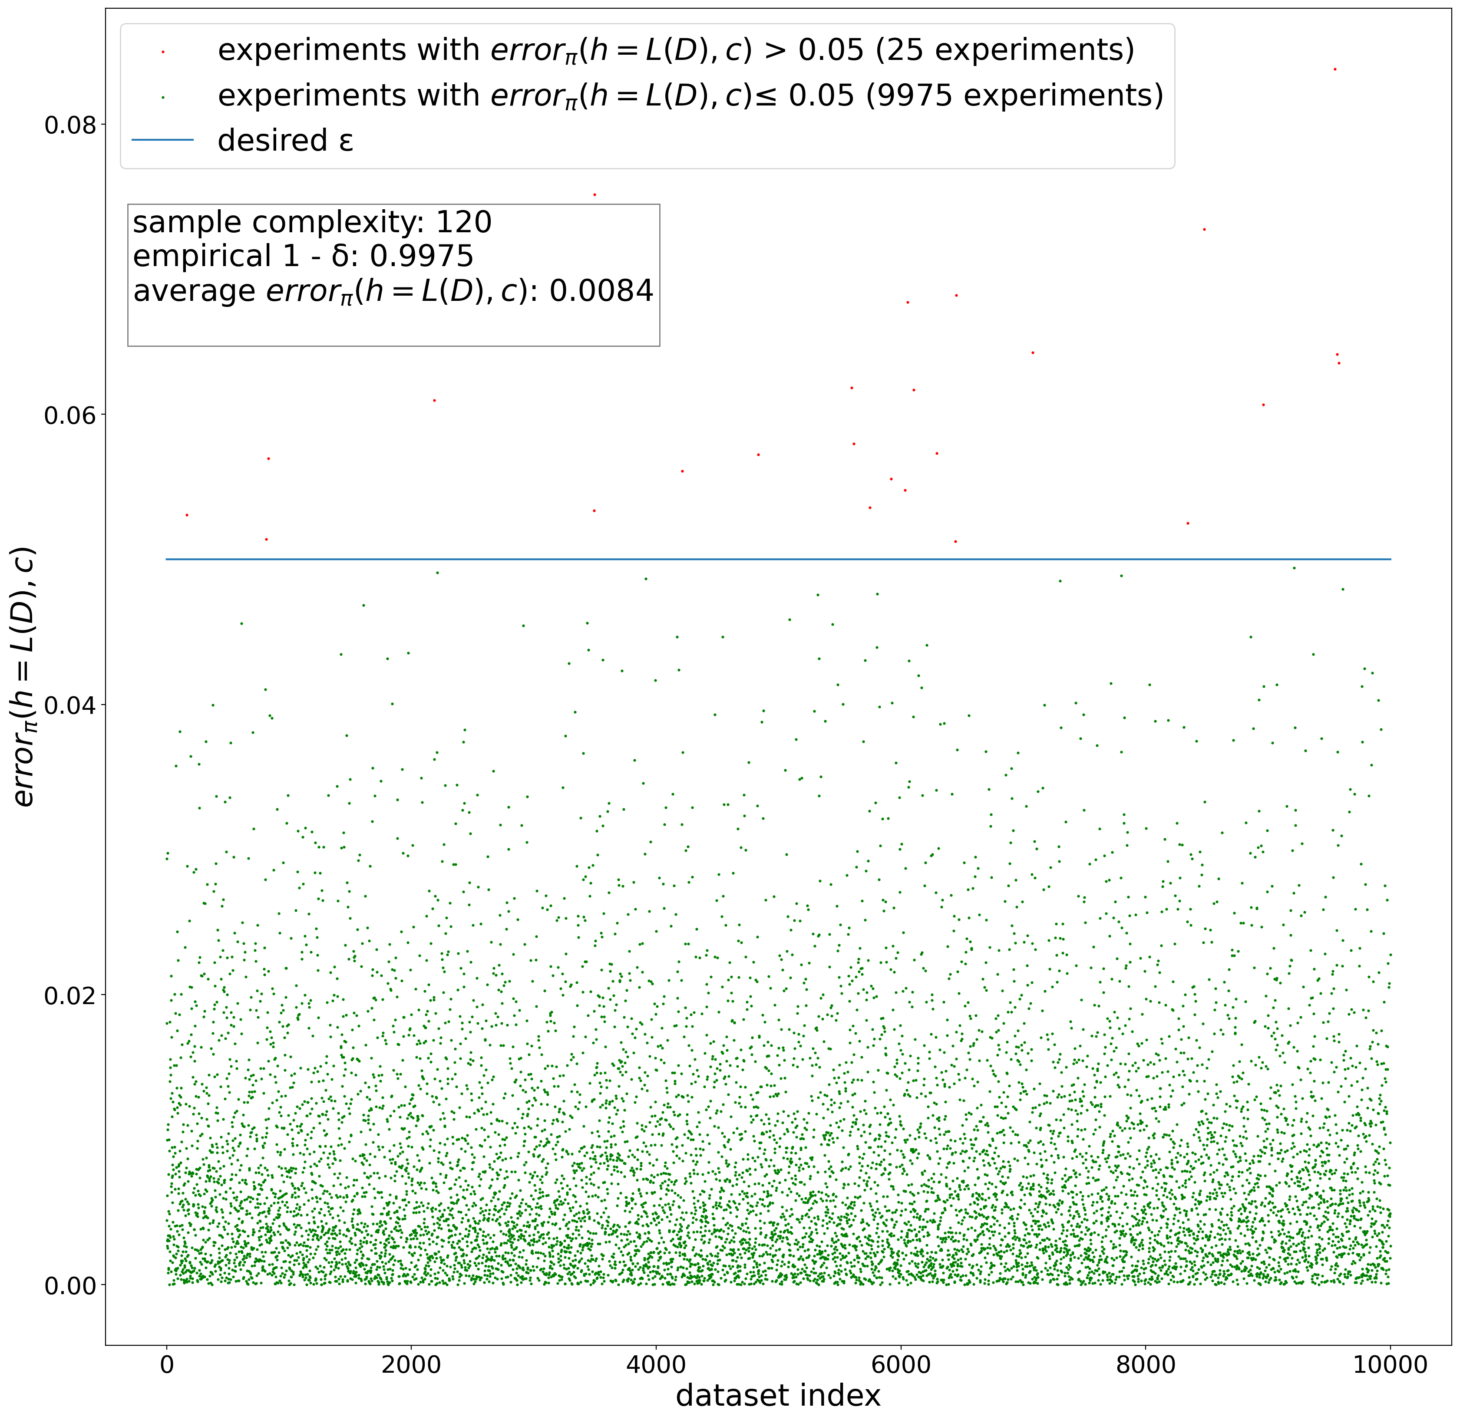

In [22]:
def run_single_expriment(n_samples: int, concept_r: float, epsilon: float, delta: float):
    if n_samples is None:
        raise ValueError(f"n_samples must be a valid integer not None")
        
    # Sample the training dataset
    samples = sample_uniform_instance_space(n_samples=n_samples, uni_lower_bound=uni_lower_bound, uni_upper_bound=uni_upper_bound)
    x1 = samples[:, 0]
    x2 = samples[:, 1]
    c_train = concept_func(x1, x2)
    # This is the actual expreiment data set (D)
    train_data = np.vstack([x1, x2, c_train]).T
    hypothesis_r = learning_algorithm(D=train_data[:, :-1], c=train_data[:, -1])
    error_rate = calculte_true_error(concept_r=concept_r, hypothesis_r=hypothesis_r)
    
    return error_rate

def plot_many_experiemnts(n_samples: int, n_exp: int, concept_r: float, epsilon: float, delta: float):
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #major_error_rate = epsilon - 0.01  # Adjust this for the bulk of data points below epsilon
    #minor_error_rate = epsilon + 0.08  # Adjust this for the fewer data points above epsilon

    # Generate error rates
    error_rates = np.array([run_single_expriment(n_samples, concept_r, epsilon, delta) for i in range(n_exp)])

    # Determine which experiments have errors exceeding epsilon
    errors_above_epsilon = error_rates > epsilon
    number_of_major_errors_exp = np.sum(errors_above_epsilon)
    errors_below_epsilon = error_rates <= epsilon
    number_of_minor_errors_exp = np.sum(errors_below_epsilon)
    # Setup the plot
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # Scatter plot of error rates
    #ax.scatter(range(n_exp), error_rates, c=['red' if err else 'green' for err in error_rates > epsilon], 
    #           s=15, label=f'Experiments with error > {epsilon}: {number_of_major_errors_exp}')
    
    ax.scatter([i for i, rate in enumerate(error_rates) if rate <= epsilon], 
               [rate for rate in error_rates if rate <= epsilon], 
               c='green', s=15, label=f'Experiments with error ≤ {epsilon}: {number_of_minor_errors_exp}')
    
    # Points above epsilon
    ax.scatter([i for i, rate in enumerate(error_rates) if rate > epsilon], 
               [rate for rate in error_rates if rate > epsilon], 
               c='red', s=15, label=f'Experiments with error > {epsilon}: {number_of_major_errors_exp}')

    # Horizontal line at the epsilon threshold
    ax.axhline(y=epsilon, color='blue', linestyle='-', linewidth=2, label='Desired $\epsilon$')

    # Plot annotations and labels
    ax.set_title(f'Sample Complexity: {n_samples}\nEmpirical $1 - \delta$: {1 - np.mean(errors_above_epsilon):.4f}\nAverage Error Rate: {np.mean(error_rates):.4f}', fontsize=14)
    ax.set_xlabel('Dataset Index', fontsize=12)
    ax.set_ylabel('Error Rate ($h = L(D), c$)', fontsize=12)
    
    # Additional text annotations for the number of experiments above and below epsilon
    #ax.text(n_exp - 2000, minor_error_rate, f'Experiments with error rate > {epsilon}: {np.sum(errors_above_epsilon)}', verticalalignment='top', horizontalalignment='right', color='red', fontsize=12)
    #ax.text(n_exp - 2000, major_error_rate, f'Experiments with error rate ≤ {epsilon}: {n_exp - np.sum(errors_above_epsilon)}', verticalalignment='top', horizontalalignment='right', color='green', fontsize=12)
    
    # Legend configuration
    ax.legend(loc='upper left', fontsize=12)
    
    # Tight layout for neatness
    plt.tight_layout()
    plt.show()
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    

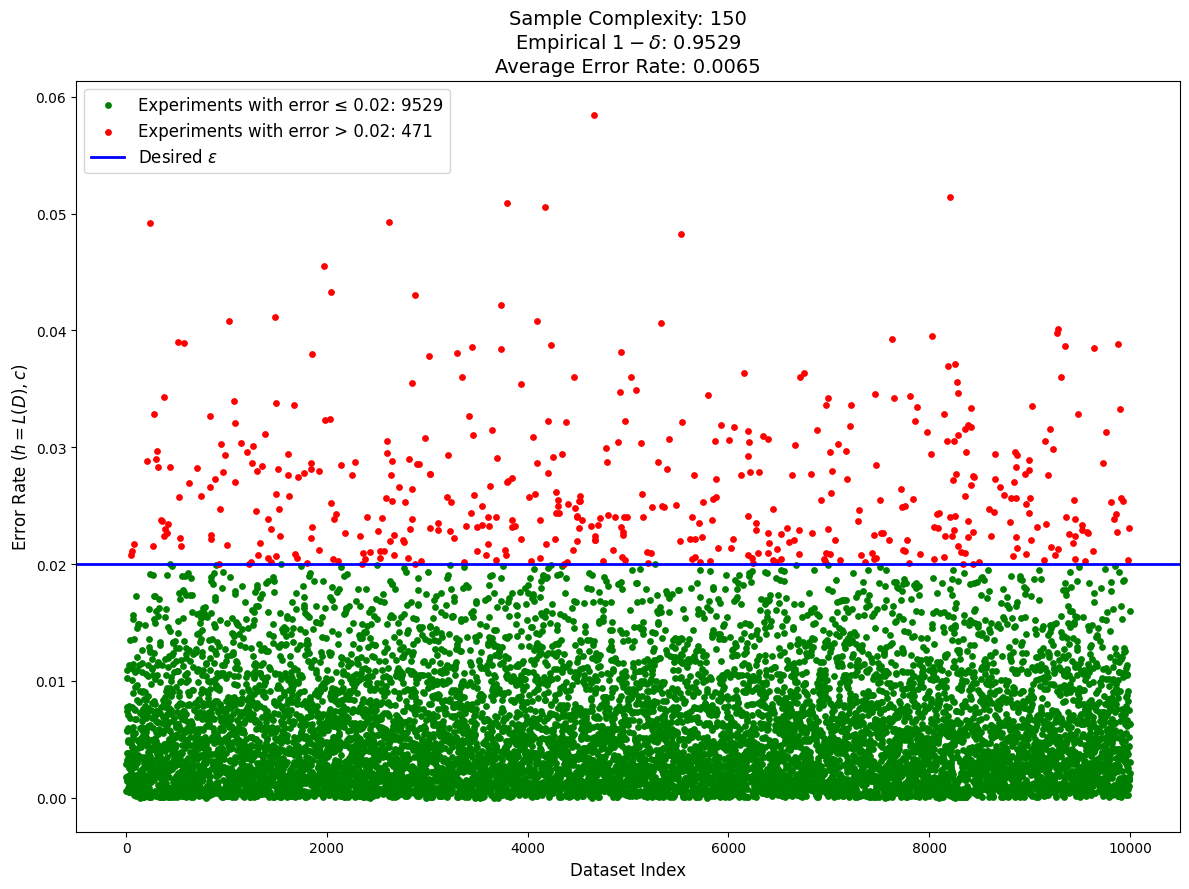

In [23]:
###########################################################################
# TODO: Fill sufficent number of samples here. 
n_samples = sample_bound(true_error=eps, uncertentity=delta)
###########################################################################
concept_r = 1.
#concept_r = 0.6
epsilon = 0.02
delta = 0.05
n_samples = sample_bound(true_error=eps, uncertentity=delta)

plot_many_experiemnts(n_samples=n_samples, n_exp=n_exp, concept_r=concept_r, epsilon=epsilon, delta=delta)

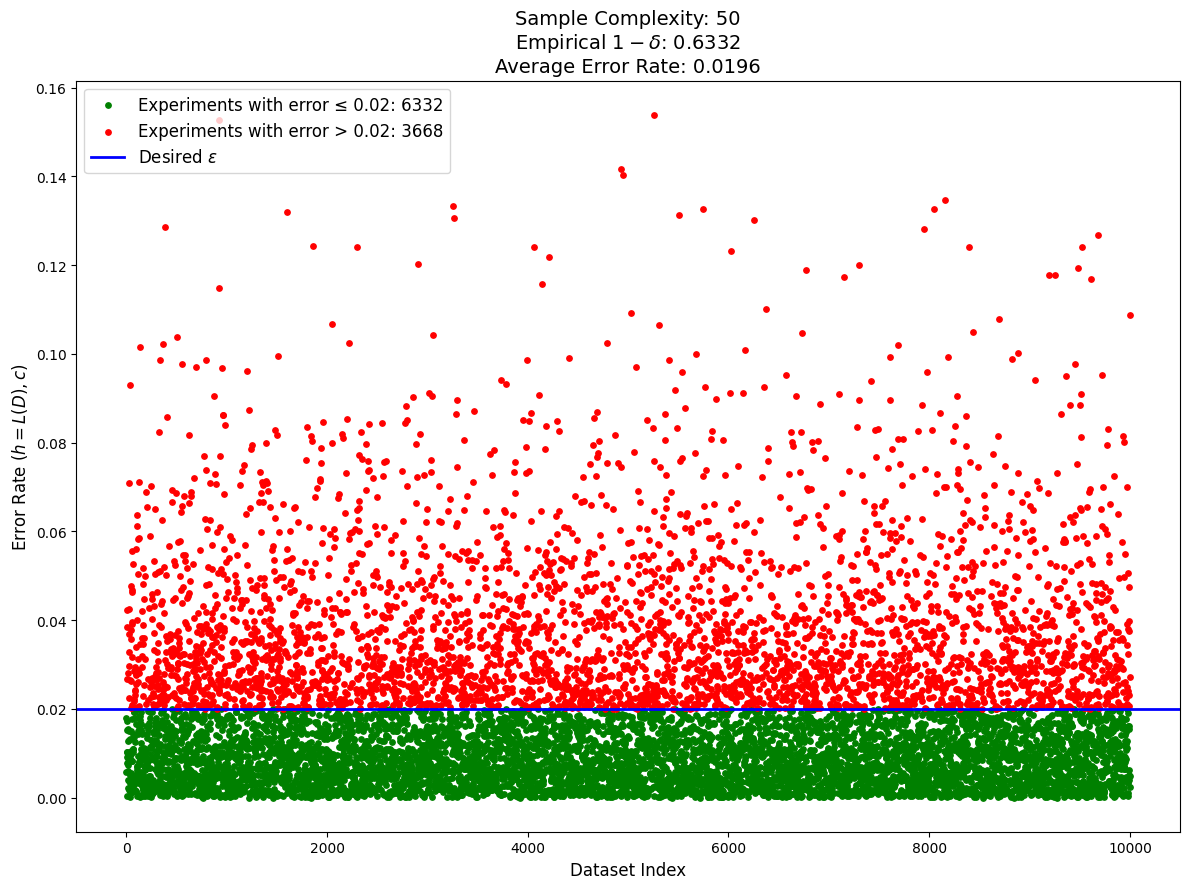

In [24]:
###########################################################################
# TODO: Fill insufficent number of samples here. 
n_samples = sample_bound(true_error=eps, uncertentity=delta)-100
###########################################################################

plot_many_experiemnts(n_samples=n_samples, n_exp=n_exp, concept_r=concept_r, epsilon=epsilon, delta=delta)

Given the same values for $\varepsilon$ and $𝑚$, if we change $c$ so that $𝑟=0.6$  
how would you expect the plot to change?
Additionally, how do you expect the empirical $delta$ to change? Please explain in a new text cell.

**Your explentation here**

In [25]:
# 1. The error rates are assumed to be uniformly distributed.
# 2. By reducing 'r', we are effectively increasing the portion of the
#    dataset that does not meet the desired concept. This change leads to a larger
#    space being classified as out of bounds according to our criteria.
#
# 3. Expected Changes in the Plot:
#    - As 'r' decreases, the proportion of data points that do not align with the
#      desired outcomes increases.
#    - This will likely result in more experiments where the error rates exceed
#      the threshold epsilon (ε), as there is now a greater chance of sampling
#      from the less favorable part of the distribution. We will see more points above the blue line.
#
# 4. Effect on Empirical 'delta' (δ):
#    - Empirical 'delta', which quantifies the proportion of experiments with
#      error rates above epsilon (ε), is expected to increase. This is due to the
#      higher frequency of obtaining error rates from the expanded unfavorable region
#      of the error rate distribution.
#    - Consequently, the plot will show a higher density of points above the ε threshold,
#      visually representing an increase in unfavorable outcomes.
#